<a href="https://colab.research.google.com/github/DJCordhose/ai/blob/master/notebooks/2019_tf/embeddings-viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Latent Neural Spaces

https://www.sfdatainstitute.org/

## Experiments
1. Add one airport into manual embedding
2. Add one airport description here and let it train into embedding

## More notebooks
* TODO: AE notebooks incl advanced

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

1.13.0-rc1


### Challenge: You have a couple of airports and want to bring them into a numerical representation to enable processing with neural networks. How do you do that?

In [0]:
# https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic

airports = {
 'HAM': ["germany europe regional", 18],
 'TXL': ["germany europe regional", 21],
 'FRA': ["germany europe hub", 70],
 'MUC': ["germany europe hub", 46],
 'CPH': ["denmark capital scandinavia europe hub", 29],
 'ARN': ["sweden capital scandinavia europe regional", 27],
 'BGO': ["norway scandinavia europe regional", 6],
 'OSL': ["norway capital scandinavia europe regional", 29],
 'LHR': ["gb capital europe hub", 80],
 'CDG': ["france capital europe hub", 72],
 'SFO': ["usa california regional", 58],
 'IAD': ["usa capital regional", 21],
 'AUS': ["usa texas regional", 16],
 'EWR': ["usa new_jersey hub", 46],
 'JFK': ["usa new_york hub", 62],
 'ATL': ["usa georgia hub", 110],
 'STL': ["usa missouri regional", 16],
 'LAX': ["usa california hub", 88]
}

In [0]:
airport_names = list(airports.keys())
airport_numbers = list(range(0, len(airports)))
airport_to_number = dict(zip(airport_names, airport_numbers))
number_to_airport = dict(zip(airport_numbers, airport_names))
airport_descriptions = [value[0] for value in list(airports.values())]
airport_passengers = [value[1] for value in list(airports.values())]

### Encode Texts in multi-hot frequency

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(airport_descriptions)
description_matrix = tokenizer.texts_to_matrix(airport_descriptions, mode='freq')

aiport_count, word_count = description_matrix.shape
dictionary_size = word_count
aiport_count, word_count

(18, 20)

In [0]:
x = airport_numbers
Y = description_matrix

## 2d embeddings

CPU times: user 14.9 s, sys: 661 ms, total: 15.6 s
Wall time: 11.5 s
CPU times: user 15.1 s, sys: 670 ms, total: 15.8 s
Wall time: 11.7 s


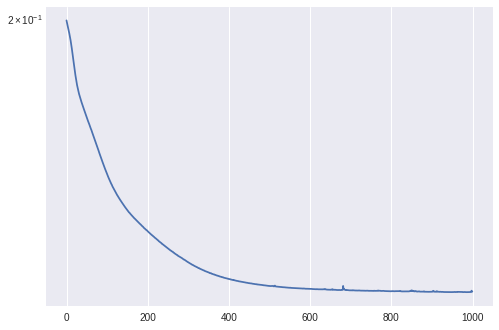

In [6]:
%%time

import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, GlobalAveragePooling1D, Dense, LSTM, GRU, SimpleRNN, Bidirectional, Embedding
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.initializers import glorot_normal
seed = 3

input_dim = len(airports)
embedding_dim = 2

model = Sequential()

model.add(Embedding(name='embedding',
                    input_dim=input_dim, 
                    output_dim=embedding_dim, 
                    input_length=1,
                    embeddings_initializer=glorot_normal(seed=seed)))

model.add(GlobalAveragePooling1D())

model.add(Dense(units=50, activation='relu', bias_initializer='zeros', kernel_initializer=glorot_normal(seed=seed)))

model.add(Dense(units=dictionary_size, name='output', activation='softmax', bias_initializer='zeros', kernel_initializer=glorot_normal(seed=seed)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

EPOCHS=1000
BATCH_SIZE=2

%time history = model.fit(x, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)


plt.yscale('log')
plt.plot(history.history['loss'])

In [7]:
loss, accuracy = model.evaluate(x, Y)
loss, accuracy

18/18 [==============================] - 0s 2ms/sample - loss: 0.1056 - acc: 0.8194


(0.10561902076005936, 0.8194444)

HAM (-0.14184302, -1.0206505)
TXL (-0.14182125, -1.0176324)
FRA (-0.45968637, 0.11313272)
MUC (-0.4607175, 0.11429134)
CPH (0.47033364, 1.6663198)
ARN (0.51490235, -0.13788806)
BGO (0.24729192, -0.29857168)
OSL (0.31724352, -0.02649477)
LHR (-0.20539573, 0.74625486)
CDG (-0.8841763, 1.71294)
SFO (1.821034, -0.8156518)
IAD (1.4758714, -0.09940209)
AUS (-1.6667618, -2.1325274)
EWR (-1.4560398, 0.465195)
JFK (-1.9628708, 1.3990676)
ATL (1.8770223, 1.2014403)
STL (-1.3286403, -1.0055003)
LAX (-1.2215878, -0.040400524)


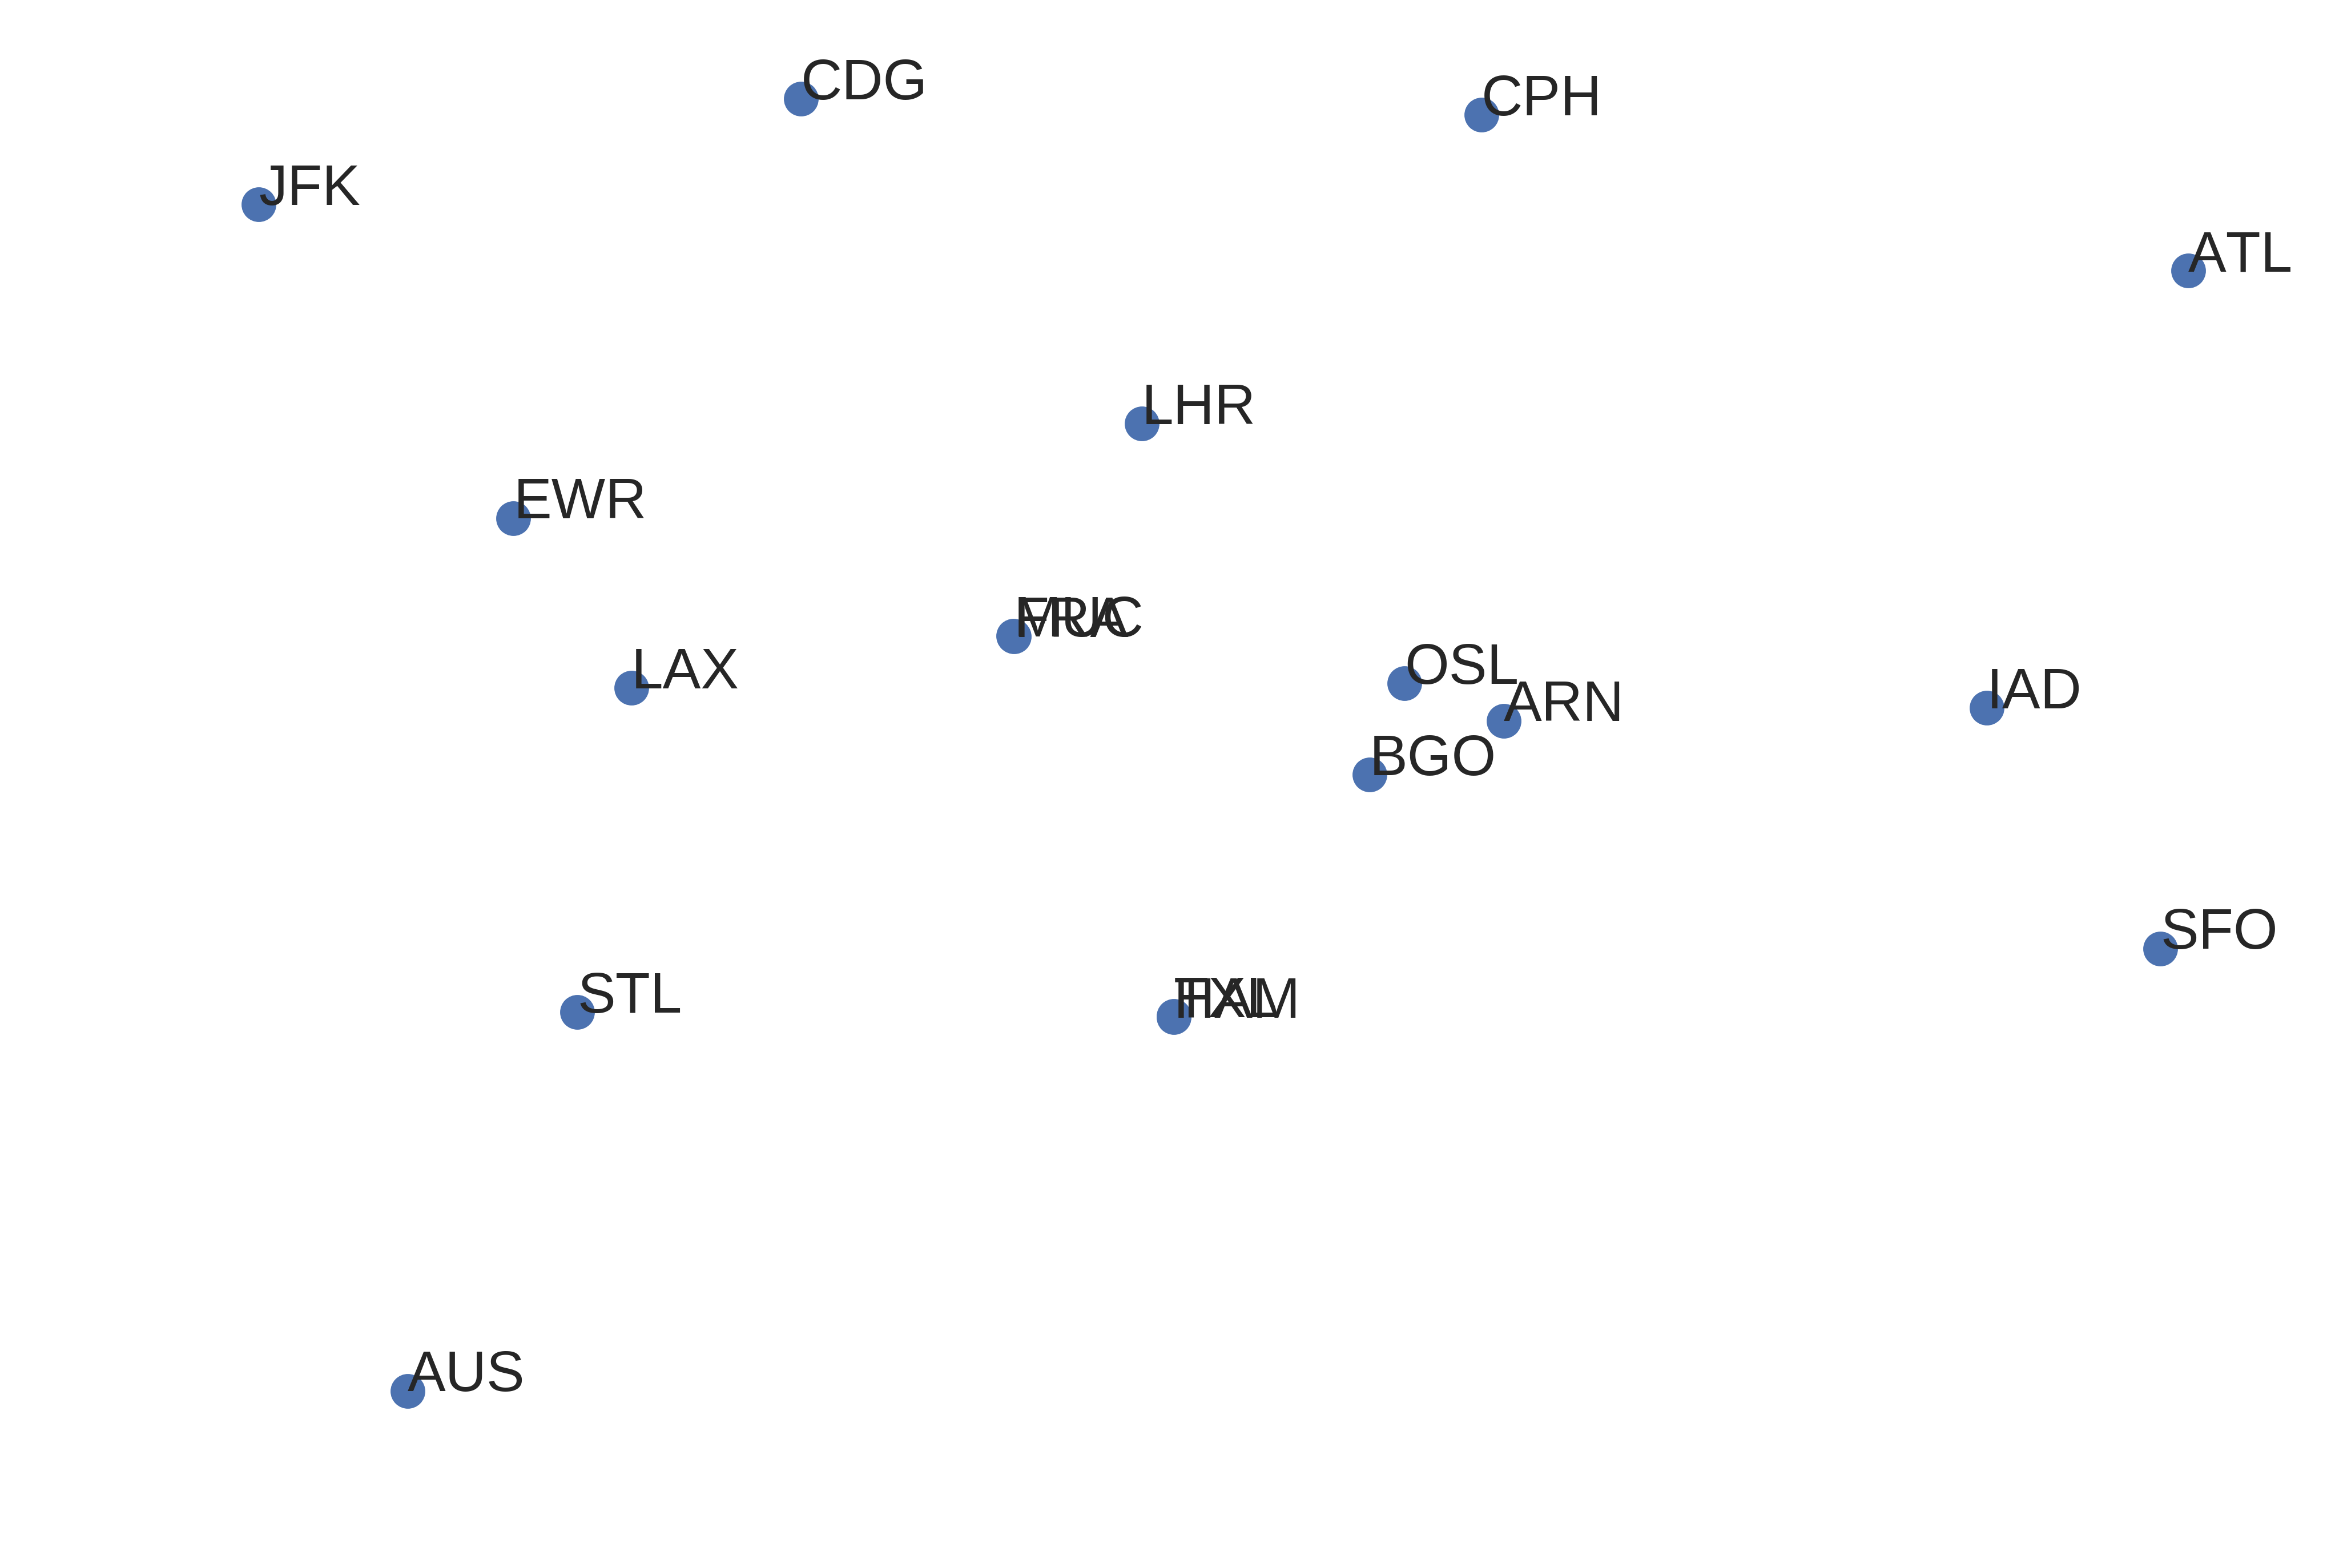

In [8]:
embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embeddings_2d = embedding_model.predict(airport_numbers).reshape(-1, 2)

# for printing only
plt.figure(dpi=600)
plt.axis('off')
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for name, x_pos, y_pos in zip(airport_names, embeddings_2d[:, 0], embeddings_2d[:, 1]):
  print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, y_pos))

## 1d embeddings

CPU times: user 22.6 s, sys: 827 ms, total: 23.4 s
Wall time: 17.2 s


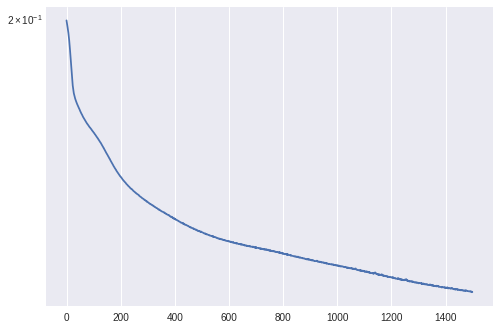

In [9]:
seed = 3

input_dim = len(airports)
embedding_dim = 1

model = Sequential()

model.add(Embedding(name='embedding',
                    input_dim=input_dim, 
                    output_dim=embedding_dim, 
                    input_length=1,
                    embeddings_initializer=glorot_normal(seed=seed)))

model.add(GlobalAveragePooling1D())

model.add(Dense(units=50, activation='relu', bias_initializer='zeros', kernel_initializer=glorot_normal(seed=seed)))

model.add(Dense(units=dictionary_size, name='output', activation='softmax', bias_initializer='zeros', kernel_initializer=glorot_normal(seed=seed)))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

EPOCHS=1500
BATCH_SIZE=2

%time history = model.fit(x, Y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)


plt.yscale('log')
plt.plot(history.history['loss'])

HAM (0.27191588, -0.040400524)
TXL (0.2704308, -0.040400524)
FRA (0.49200854, -0.040400524)
MUC (0.49469757, -0.040400524)
CPH (0.6876069, -0.040400524)
ARN (-0.56269175, -0.040400524)
BGO (-0.31560698, -0.040400524)
OSL (-0.36367834, -0.040400524)
LHR (3.1702118, -0.040400524)
CDG (3.7179704, -0.040400524)
SFO (-0.05147251, -0.040400524)
IAD (-0.7641167, -0.040400524)
AUS (-1.1135032, -0.040400524)
EWR (-2.971576, -0.040400524)
JFK (-3.4875953, -0.040400524)
ATL (1.7018898, -0.040400524)
STL (-1.6000652, -0.040400524)
LAX (1.3269391, -0.040400524)


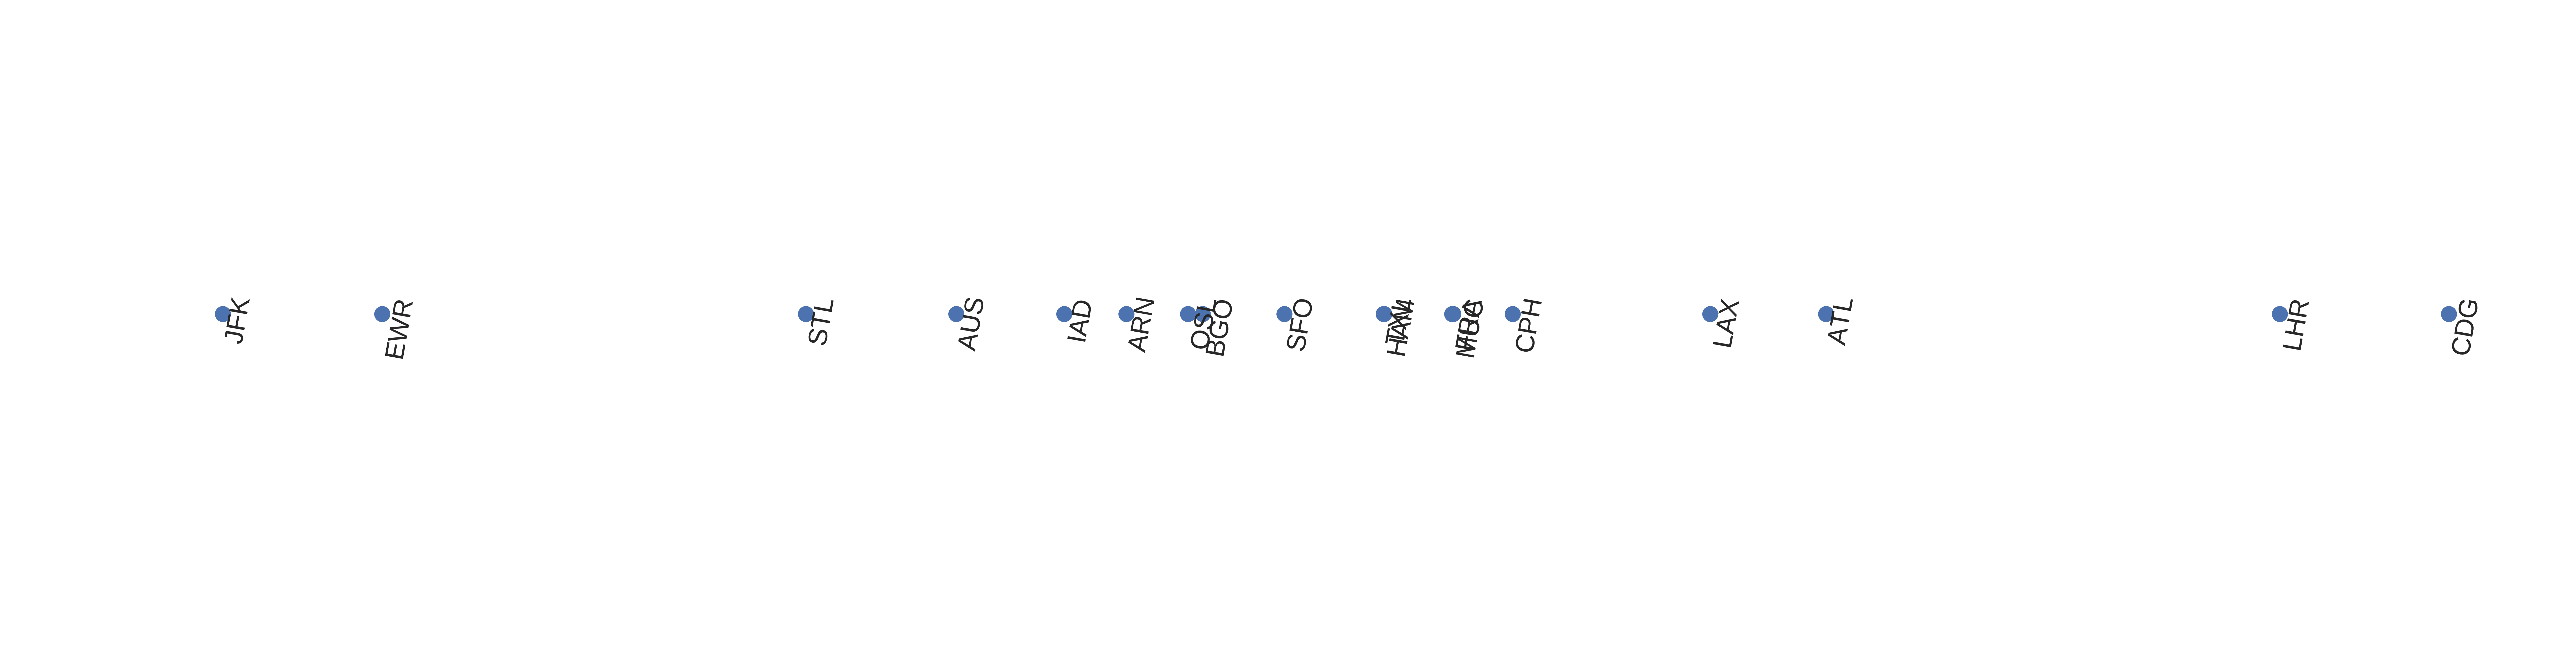

In [11]:
import numpy as np

embedding_layer = model.get_layer('embedding')
embedding_model = Model(inputs=model.input, outputs=embedding_layer.output)
embeddings_1d = embedding_model.predict(airport_numbers).reshape(-1)

# plt.figure(figsize=(20,5))
plt.figure(figsize=(20,5), dpi=600)
plt.axis('off')
plt.scatter(embeddings_1d, np.zeros(len(embeddings_1d)))
for name, x_pos in zip(airport_names, embeddings_1d):
  print(name, (x_pos, y_pos))
  plt.annotate(name, (x_pos, 0), rotation=80)